<center><H2>Lab 4

> <center><H1>Implementation of Image Segmentation Methods

In [41]:
#generic import statements, pip3 list for all installations

import cv2 as cv
import math
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt

In [ ]:
path = "/home/cvl-5aiml-a2/Downloads/bowzer.jpg"

segTest1 = "/home/cvl-5aiml-a2/Downloads/segmentation_1.jpg"
segTest2 = "/home/cvl-5aiml-a2/Downloads/segmentation_2.jpg"
lineTest2 = "/home/cvl-5aiml-a2/Downloads/line_detection_2.png"
lineTest3 = "/home/cvl-5aiml-a2/Downloads/line-detection_3.jpg"

image = cv.imread(path,0) #Taking as 0 for binary segmentation in this case
sImg1 = cv.imread(segTest1,0)
sImg2 = cv.imread(segTest2, 0)


<h3> Lab Exercises

1) Write a program to create binary images using thresholding methods.

In [ ]:
"""
Implementation of various segmentation algorithms
"""

ret, seg1 = cv.threshold(sImg1, 128, 255,cv.THRESH_BINARY)
ret, seg2 = cv.threshold(sImg1, 128, 255,cv.THRESH_BINARY_INV)
ret, seg3 = cv.threshold(sImg1, 128, 255,cv.THRESH_OTSU)
ret, seg4 = cv.threshold(sImg1, 128, 255,cv.THRESH_TOZERO)
ret, seg5 = cv.threshold(sImg1, 128, 255,cv.THRESH_TRUNC)


output = cv.hconcat([seg1, seg2, seg3, seg4, seg5])
cv.imshow("From left to right: Binary, Inv Binary, Otsu, ToZero, Trunc", output)

cv.waitKey(0)
cv.destroyAllWindows()

2) Write a program to detect lines using Hough transform.

In [31]:
import cv2 as cv
import numpy as np

lineTest1 = "/home/cvl-5aiml-a2/Downloads/line_detection_1.png"
lImg1 = cv.imread(lineTest1, 0) 
lImg1_color = cv.imread(lineTest1)

edges = cv.Canny(lImg1,128,255)
cv.imshow('edge display', edges)

line_image = np.copy(lImg1_color) 

lines = cv.HoughLinesP(edges, 1, np.pi/180, 80, 50, 10)

if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv.line(line_image, (x1, y1), (x2, y2), (0,255,0), 2)

cv.imshow("test iamge", line_image) # Display the color image with lines
cv.waitKey(0)
cv.destroyAllWindows()

3. Write a program to segment an image based on colour.

In [ ]:
"""
Implementation of various segmentation algorithms based on color
"""

ret, seg1 = cv.threshold(image, 128, 255,cv.THRESH_BINARY)
ret, seg2 = cv.threshold(image, 128, 255,cv.THRESH_BINARY_INV)
ret, seg4 = cv.threshold(image, 128, 255,cv.THRESH_TOZERO)
ret, seg5 = cv.threshold(image, 128, 255,cv.THRESH_TRUNC)

output = cv.hconcat([image, seg1, seg2, seg4, seg5])
cv.imshow("From left to right: Binary, Inv Binary, ToZero, Trunc", output)

cv.waitKey(0)
cv.destroyAllWindows()

4. Implement K means clustering algorithm.

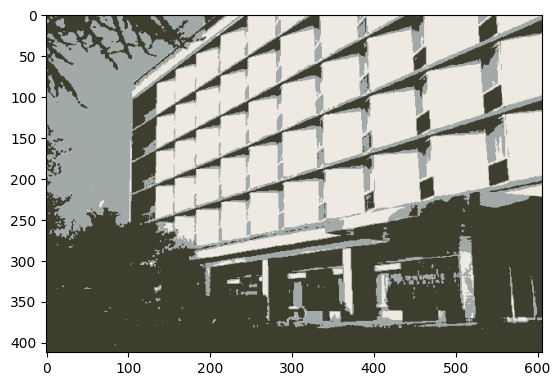

In [42]:
lTest1 = cv.imread(lineTest1)
lTest2 = cv.imread(lineTest2)
pixel_vals = lTest1.reshape((-1,3))
pixel_vals = np.float32(pixel_vals)
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.85)

k = 3
retval, labels, centers = cv.kmeans(pixel_vals, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]

segmented_image = segmented_data.reshape((lTest1.shape))
segmented_image_rgb = cv.cvtColor(segmented_image, cv.COLOR_BGR2RGB)
plt.imshow(segmented_image_rgb)

---